# Regressão logística

Determinar se uma pessoa terá doença no coração num intervalo de dez anos, baseado no seu histórico médico, condições médicas atuais e comportamento

Dataset obtido no Kaggle (https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('framingham.csv')

In [3]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Informações:

male: 1 -> homem, 0 -> mulher (variável categórica)

age: idade (variável contínua)

educação: nível educacional (variável categórica)

currentSmoker: 1 -> fumante, 0 -> não fumante (variável categórica)

cigsPerDay: quantidade de cigarros por dia (variável contínua)

BPMeds: 1 -> paciente toma medicamente para pressão, 0- > não toma medicamento (variável categórica)

prevalentStroke: 1 -> paciente teve derrame, 0 -> não teve (variável categórica)

prevalentHyp: 1 -> hipertensor, 0 -> não hipertenso (variável categórica)

diabetes: 1 -> tem diabetes, 0 -> não tem (variável categórica)

totChol: colesterol total (variável contínua)

sysBP: pressão sanguínea sistólica (variável contínua)

diaBP: pressão sanguínea diastólica (variável contínua)

BMI: indice de massa corporal (variável contínua) 

heartRate: batimento cardíaco (variável contínua) 

glucose: glicose (variável contínua)

TenYearCHD: 1 -> terá problema, 0 -> não terá (variável categórica)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Observa-se ausência de valores em diversas variáveis

Verificando quantidade de valores do tipo NaN

In [5]:
dados.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Glicose é a variável com maior quantidade de valores ausentes. Em relação a quantidade total de valores, podemos remover todos estes casos.

In [6]:
dados = dados.dropna()

In [8]:
dados.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

/home/danilo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


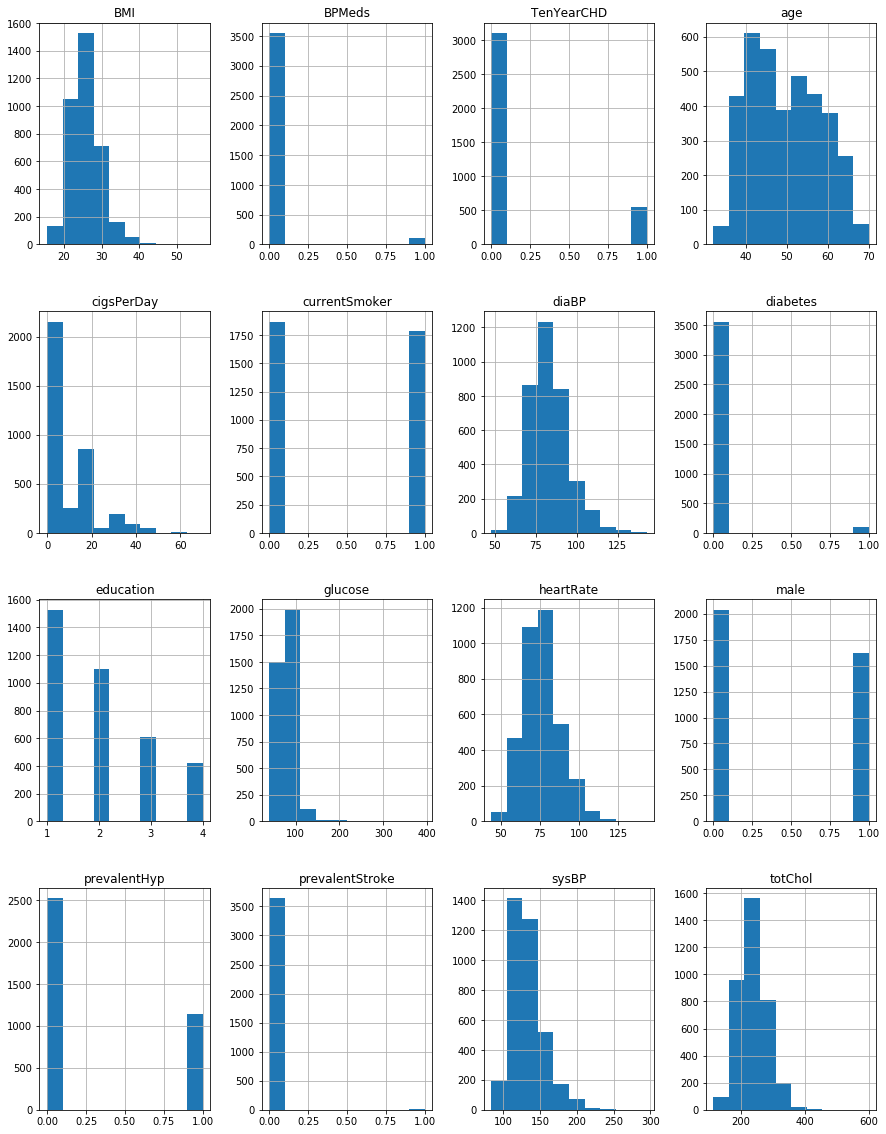

In [19]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dados.hist(ax=ax);

Verificando a correlação entre as variáveis

In [20]:
correlacao = dados.corr()

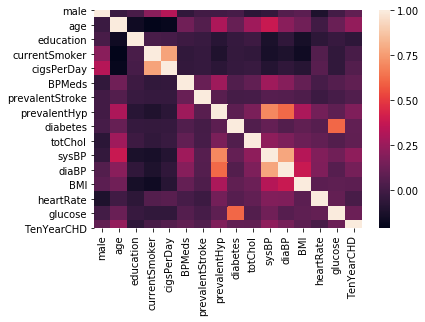

In [21]:
sns.heatmap(correlacao)